In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

In [164]:
# Download and load the data
import keras
import os

f_path_1 = "data/Euro_Salary.csv"
url_1 = "https://github.com/AkeemSemper/ml_data/raw/main/Euro_Salary.csv"
if not os.path.exists(f_path_1):
    file_1 = keras.utils.get_file(f_path_1, url_1)
df = pd.read_csv(f_path_1)

# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year. 

The data file provided is a salary survey for tech workers in Europe. We want to predict the total amount of compensation they bring in each year, based off of the details of their work. 

Some notes that will be important:
<ul>
    <li>The total compensation will need to be constructed, there is a column for salary, "Yearly brutto salary (without bonus and stocks) in EUR", as well as a column for bonus compensation, "Yearly bonus + stocks in EUR". 
    <li>Some categorical variables will need some work, and there isn't generally an exact answer. The main concern is things with categories that have a bunch of values with a very small count. For example, if there is only 1 person in City X, then that value likely needs to be addressed. We don't want it encoded into a new column of one 1 and thousands of 0s. 
    <li>There is an article exploring some of the data here: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
    <li>Imputation and a bit of data manipulation will be required. 
    <li>Use any regression method you'd like. Some ones are closely related to what we've done, you may want to look at them, e.g. ExtraTreesRegressor. 
    <li>Initial accurracy, and potentially final accuracy, may not be great. When I made a plain model will little optimization the errors were large and the R2 was low. There is lots of room for optimization. 
    <li>Research challenge - try some work on the target, look into TransformedTargetRegressor and see if that helps. Recall in stats when we had skewed distributions... Maybe it helps, maybe it doesn't. 
    <li>EDA and data prep are up to you - you'll probably need to do a little exploring to figure out what cleanup is needed. When I did it, I did things kind of iteratively when I did it. For example, look at the value counts, figure out how to treat the different categories, clean something up, look at the results, potentially repeat if needed. After you figure out what needs to be done, you may be able to take some of those steps and incorporate them into a pipeline to be cleaner....
    <li><b>CRITICAL - Please make sure you publish it after having run it, all the output should be showing.</b>
</ul>

### Details and Deliverables

You'll need to build code to produce the predictions. In particular, there's a few things that'll be marked:
<ul>
    <li>Please add a "presentation version" at the bottom, where you show what you did, and the results. Basically, you start with the original data, you do some work to figure out what's needed, you try a few models and select the best. At the bottom, put what <i>you actually settled on</i>, i.e. after all the figuring and exploring, here's the code that goes from raw data to final results, and here's what the results were. I should be able to read this part and understand what you did clearly:
    <ul>
        <li> Please make a pipeline that does the prep work - you may need some exploration or several trials before settling on what exactly to use, that's normal. Once you've settled, build that into a pipeline so it's clear and repeatable.
        <li> What you settled on for data cleaning, along with what prompted it. 
        <li> Feature Selection - Please identify what you did for feature selection. No need for a long explaination, something along the lines of "I did X, and the result was that 4 features were removed". Try at least 2 things. 
        <li> Model selection - between selecting a model style and tuning it with hyperparameters, what did you test and what won?
        <li> Overall, how good was your model and what things may make sense to try to do even better? 
        <li> If you could use titles/bullet points I'd really appreciate it. 
    </ul>
    <li>Grade Breakdown:
    <ul>
        <li> Code is readable, there are comments: 20%
        <li> Explaination as defined above: 60% (20% each point)
        <li> Accuracy: 20% As compared to everyone else. This will be generously graded, I won't be surprised if overall accuracy is low for most people. 
    </ul>
</ul>

<b>The biggest challenge here is translating the data into something useful and clean. This will probably require a bit of exploration, examining the data, thinking about what it means, trying something, then making a model to see what the results are. In particular, think about what value some of the less clean bits of data my hold - binning/grouping, numerical transformations, outlier removal, etc... are all likely to be useful somewhere. You almost certainly need to look at it column by column and make a decision, I'll apologize up front, it isn't the most fun process in the world. There is not one specific correct answer.</b>

In [165]:
#Load Data
#df = pd.read_csv("data/Euro_Salary.csv")
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 14:07:23,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226.0,NaN,NaN,NaN,32.509788,5.663804,20.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
df[393:396]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
393,24/11/2020 19:15:02,30.0,Male,Moscow,Software Engineer,5,0,Middle,C,C/C++,14712.0,0,30,Full-time employee,Unlimited contract,Russian,101-1000,Product
394,24/11/2020 19:15:49,33.0,Male,Berlin,Product Manager,5,5,Senior,NaN,Python,70000.0,800,30,Full-time employee,NaN,German,101-1000,Product
395,24/11/2020 19:19:30,35.0,Male,Berlin,QA Engineer,11,10,Senior,Java,"Python, Javascript / Typescript, .NET, Java / ...",74400.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product


In [167]:
#df.info()
df["Other technologies/programming languages you use often"].value_counts()

Other technologies/programming languages you use often
Javascript / Typescript                                                          44
Python                                                                           37
SQL                                                                              31
AWS, Docker                                                                      16
Kotlin                                                                           15
                                                                                 ..
Java / Scala, AWS, Kubernetes                                                     1
Java / Scala, AWS, Google Cloud, Kubernetes, Docker                               1
Go, Rust, Kubernetes                                                              1
Python, C/C++, Javascript / Typescript, Java / Scala, SQL, Kubernetes, Docker     1
Python, Java / Scala, R, SQL, Google Cloud                                        1
Name: count, Length: 

In [168]:
df.sample(20)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
984,30/11/2020 18:41:07,29.0,Male,Berlin,Data Scientist,5,2,Senior,Python,"Python, R, SQL, Google Cloud",75000.0,0,24,Full-time employee,Unlimited contract,English,11-50,Startup
1017,01/12/2020 08:49:09,35.0,Male,Murnau am Staffelsee,Beikoch,1,1,Middle,Apotheker,NaN,30000.0,1000,20,Full-time employee,Temporary contract,German,up to 10,Biergarten
923,30/11/2020 10:50:53,27.0,Male,Nürnberg,QA Engineer,3,3,Middle,NaN,NaN,55000.0,0,30,Full-time employee,Unlimited contract,German,101-1000,Consulting / Agency
332,24/11/2020 17:31:48,34.0,Male,Berlin,Software Engineer,10,10,Senior,C++,Python,76000.0,12000,30,Full-time employee,Unlimited contract,English,101-1000,Product
56,24/11/2020 11:33:33,35.0,Male,Munich,Software Engineer,11,3,Senior,Php,"Javascript / Typescript, AWS, Kubernetes, Docker",65000.0,5000,29,Full-time employee,Unlimited contract,German,101-1000,Product
429,24/11/2020 20:41:21,23.0,Male,Berlin,Mobile Developer,3,0,Lead,Swift,Swift,65000.0,65000,25,Full-time employee,Unlimited contract,English,51-100,Startup
1227,06/01/2021 21:42:52,34.0,Male,Berlin,Frontend Developer,6,2,Middle,Javascript,Javascript / Typescript,63000.0,0,25,Full-time employee,NaN,English,101-1000,Startup
1224,05/01/2021 23:51:56,31.0,Male,Munich,Backend Developer,10,7,Senior,Ruby on Rails,"Python, Kotlin, Ruby, AWS, Docker",85000.0,85000,27,Full-time employee,Unlimited contract,English,101-1000,Startup
168,24/11/2020 12:23:47,28.0,Male,Munich,Backend Developer,6,5,Senior,Java,"Javascript / Typescript, Java / Scala, SQL",70000.0,2000,30,Full-time employee,Unlimited contract,English,101-1000,Consulting / Agency
12,24/11/2020 11:18:22,NaN,NaN,Berlin,Software Engineer,NaN,NaN,Lead,PHP,NaN,90000.0,40000,NaN,Full-time employee,Unlimited contract,English,1000+,NaN


In [169]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR', 'Number of vacation days',
       'Employment status', 'Сontract duration', 'Main language at work',
       'Company size', 'Company type'],
      dtype='object')

In [170]:
df.rename(columns={
    'Timestamp': 'timestamp',
    'Age': 'age',
    'Gender': 'gender',
    'City': 'city',
    'Position ': 'position',
    'Total years of experience': 'years_exp_total',
    'Years of experience in Germany': 'years_exp_germany',
    'Seniority level': 'seniority',
    'Your main technology / programming language': 'main_tech',
    'Other technologies/programming languages you use often': 'other_tech',
    'Yearly brutto salary (without bonus and stocks) in EUR': 'salary_eur',
    'Yearly bonus + stocks in EUR': 'bonus_n_stocks_eur',
    'Number of vacation days': 'vacation_days',
    'Employment status': 'employment_status',
    'Сontract duration': 'contract_duration',
    'Main language at work': 'language_work',
    'Company size': 'company_size',
    'Company type': 'company_type'
}, inplace=True)


In [171]:
df.drop(columns=['timestamp'], inplace=True)
df.columns

Index(['age', 'gender', 'city', 'position', 'years_exp_total',
       'years_exp_germany', 'seniority', 'main_tech', 'other_tech',
       'salary_eur', 'bonus_n_stocks_eur', 'vacation_days',
       'employment_status', 'contract_duration', 'language_work',
       'company_size', 'company_type'],
      dtype='object')

In [172]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

In [173]:
category = ['gender', 'city', 'position', 'seniority', 'employment_status', 'contract_duration', 'language_work','company_size', 'company_type', 'other_tech', 'main_tech']
numeric = ['age', 'years_exp_total', 'years_exp_germany', 'salary_eur', 'bonus_n_stocks_eur', 'vacation_days']

In [174]:
for col in numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [175]:
for col in category:
    df[col] = df[col].str.lower()

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1226 non-null   float64
 1   gender              1243 non-null   object 
 2   city                1253 non-null   object 
 3   position            1247 non-null   object 
 4   years_exp_total     1230 non-null   float64
 5   years_exp_germany   1194 non-null   float64
 6   seniority           1241 non-null   object 
 7   main_tech           1126 non-null   object 
 8   other_tech          1096 non-null   object 
 9   salary_eur          1253 non-null   float64
 10  bonus_n_stocks_eur  823 non-null    float64
 11  vacation_days       1172 non-null   float64
 12  employment_status   1236 non-null   object 
 13  contract_duration   1224 non-null   object 
 14  language_work       1237 non-null   object 
 15  company_size        1235 non-null   object 
 16  compan

### Null bonus is zero bonus

In [177]:
df['bonus_n_stocks_eur'] = df['bonus_n_stocks_eur'].fillna(0)

### If the target is salary, we can use it as a basis to fill out the rest of the numeric nulls

In [178]:
df['salary_bin'] = pd.qcut(df['salary_eur'], q=10)
df['years_exp_total'] = df['years_exp_total'].fillna(df.groupby('salary_bin')['years_exp_total'].transform('median'))


C:\Users\Chabiloo\AppData\Local\Temp\ipykernel_39456\89348394.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['years_exp_total'] = df['years_exp_total'].fillna(df.groupby('salary_bin')['years_exp_total'].transform('median'))


In [179]:
df['age'] = df['age'].fillna(df.groupby('salary_bin')['age'].transform('median'))

C:\Users\Chabiloo\AppData\Local\Temp\ipykernel_39456\705783974.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['age'] = df['age'].fillna(df.groupby('salary_bin')['age'].transform('median'))


In [180]:
df['years_exp_germany'] = df['years_exp_germany'].fillna(df.groupby('salary_bin')['years_exp_germany'].transform('median'))

C:\Users\Chabiloo\AppData\Local\Temp\ipykernel_39456\611473347.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['years_exp_germany'] = df['years_exp_germany'].fillna(df.groupby('salary_bin')['years_exp_germany'].transform('median'))


In [181]:
df['vacation_days'] = df['vacation_days'].fillna(df.groupby('salary_bin')['vacation_days'].transform('median'))
df.drop(columns=['salary_bin'], inplace=True)

C:\Users\Chabiloo\AppData\Local\Temp\ipykernel_39456\2485278376.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['vacation_days'] = df['vacation_days'].fillna(df.groupby('salary_bin')['vacation_days'].transform('median'))


### For some of the categorical features: fill w/ 'unknown'


In [182]:
df['other_tech'] = df['other_tech'].fillna('unknown')
df['main_tech'] = df['main_tech'].fillna('unknown')
df['position'] = df['position'].fillna('unknown')
df['seniority'] = df['seniority'].fillna('unknown') 
df['employment_status'] = df['employment_status'].fillna('unknown')
df['contract_duration'] = df['contract_duration'].fillna('unknown')
df['gender'] = df['gender'].fillna('unknown')
df['company_size'] = df['company_size'].fillna('unknown')
df['company_type'] = df['company_type'].fillna('unknown')

### Guessing that cities can determine working language

In [183]:
null_both = df['city'].isna() & df['language_work'].isna()
count = null_both.sum()
print(count)

0


In [184]:
df['language_work'] = df.groupby('city')['language_work'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown'))
df['city'] = df.groupby('language_work')['city'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown'))

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1253 non-null   float64
 1   gender              1253 non-null   object 
 2   city                1253 non-null   object 
 3   position            1253 non-null   object 
 4   years_exp_total     1253 non-null   float64
 5   years_exp_germany   1253 non-null   float64
 6   seniority           1253 non-null   object 
 7   main_tech           1253 non-null   object 
 8   other_tech          1253 non-null   object 
 9   salary_eur          1253 non-null   float64
 10  bonus_n_stocks_eur  1253 non-null   float64
 11  vacation_days       1253 non-null   float64
 12  employment_status   1253 non-null   object 
 13  contract_duration   1253 non-null   object 
 14  language_work       1253 non-null   object 
 15  company_size        1253 non-null   object 
 16  compan

### No more nulls, cleaning is next. Starting with categorical columns

In [186]:
letmesee = [f"{x}: {df[x].nunique()} unique values\n{df[x].value_counts()}" for x in category]
for item in letmesee:
    print(item)
    print("-" * 20)

gender: 4 unique values
gender
male       1049
female      192
unknown      10
diverse       2
Name: count, dtype: int64
--------------------
city: 108 unique values
city
berlin         681
munich         236
frankfurt       44
hamburg         40
stuttgart       33
              ... 
duesseldorf      1
copenhagen       1
sevilla          1
krakow           1
saarbrücken      1
Name: count, Length: 108, dtype: int64
--------------------
position: 134 unique values
position
software engineer                        387
backend developer                        174
data scientist                           110
frontend developer                        89
qa engineer                               71
                                        ... 
software architekt                         1
testmanager                                1
erp consultant                             1
researcher/ consumer insights analyst      1
it operations manager                      1
Name: count, Length: 134, dt

### Let's deal with main and other tech mentioned. They have the highest number of unique values.

In [187]:
other_tech = df['other_tech'].str.split(',').explode().str.strip().value_counts().sort_values(ascending=False).head(25)
other_tech_list = other_tech.index.tolist()
print(other_tech_list)

['docker', 'sql', 'python', 'aws', 'javascript / typescript', 'kubernetes', 'java / scala', 'unknown', 'google cloud', 'kotlin', 'go', 'c/c++', '.net', 'azure', 'php', 'r', 'ruby', 'swift', 'sap / abap', 'perl', 'rust', 'clojure', 'spark', 'elixir', 'terraform']


In [188]:
df['other_tech'].str.split(',').explode().str.strip().value_counts().sort_values(ascending=False).head(25)

other_tech
docker                     525
sql                        480
python                     409
aws                        401
javascript / typescript    381
kubernetes                 296
java / scala               229
unknown                    157
google cloud               150
kotlin                     120
go                         113
c/c++                      105
.net                        85
azure                       85
php                         82
r                           49
ruby                        41
swift                       35
sap / abap                  18
perl                        16
rust                        13
clojure                      6
spark                        5
elixir                       5
terraform                    5
Name: count, dtype: int64

In [189]:
main_tech = df['main_tech'].str.split(',').explode().str.strip().value_counts().sort_values(ascending=False).head(25)
main_tech_list = main_tech.index.tolist()
print(main_tech_list)

['python', 'java', 'unknown', 'javascript', 'php', 'c++', 'c#', 'typescript', 'swift', 'kotlin', 'scala', '.net', 'go', 'sql', 'js', 'ruby', 'c', 'ios', 'javascript / typescript', 'angular', 'kubernetes', 'aws', 'r', 'android', 'react']


In [190]:
df['main_tech'].str.split(',').explode().str.strip().value_counts().sort_values(ascending=False).head(25)

main_tech
python                     225
java                       206
unknown                    127
javascript                  85
php                         73
c++                         46
c#                          35
typescript                  33
swift                       29
kotlin                      28
scala                       28
.net                        26
go                          26
sql                         25
js                          21
ruby                        19
c                           13
ios                         11
javascript / typescript      9
angular                      9
kubernetes                   9
aws                          9
r                            9
android                      9
react                        7
Name: count, dtype: int64

### Here we create 37 columns of for the top 25 main or other tech mentioned

In [191]:
print(len(set(main_tech_list) | set(other_tech_list))) #union of top 25 main and other techs
tech_list = list(set(main_tech_list) | set(other_tech_list))
# a column for each tech in tech_list and set to 1 if present in main_tech or other_tech, else 0
for tech in tech_list:
    df[tech] = df['main_tech'].str.contains(tech, na=False) | df['other_tech'].str.contains(tech, na=False)

37


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1253 non-null   float64
 1   gender                   1253 non-null   object 
 2   city                     1253 non-null   object 
 3   position                 1253 non-null   object 
 4   years_exp_total          1253 non-null   float64
 5   years_exp_germany        1253 non-null   float64
 6   seniority                1253 non-null   object 
 7   main_tech                1253 non-null   object 
 8   other_tech               1253 non-null   object 
 9   salary_eur               1253 non-null   float64
 10  bonus_n_stocks_eur       1253 non-null   float64
 11  vacation_days            1253 non-null   float64
 12  employment_status        1253 non-null   object 
 13  contract_duration        1253 non-null   object 
 14  language_work           

### Cleaning the cities

In [193]:

correction_map = {'dusseldorf': 'düsseldorf', 'kyiv': 'kiev', 'nuremberg': 'nürnberg', 'konstanz': 'konstanz area', 'bölingen': 'boeblingen', 'warsaw, poland': 'warsaw', 'cracow': 'cracovia', 'milano': 'milan', 'zürich': 'zurich', 'dusseldurf': 'düsseldorf', 'duesseldorf': 'düsseldorf'}

df['city']=df['city'].replace(correction_map)

In [194]:
df[df.groupby('city')['city'].transform('count') >= 2].value_counts('city')

city
berlin              681
munich              236
frankfurt            44
hamburg              40
stuttgart            33
cologne              20
düsseldorf           15
amsterdam             9
karlsruhe             7
nürnberg              7
zurich                6
moscow                6
prague                6
london                5
stockholm             5
heidelberg            5
boeblingen            4
warsaw                4
helsinki              4
mannheim              4
darmstadt             3
bonn                  3
wolfsburg             3
tallinn               3
kiev                  3
rome                  3
milan                 3
hannover              3
ingolstadt            3
barcelona             2
eindhoven             2
dublin                2
brussels              2
cracovia              2
aachen                2
hildesheim            2
leipzig               2
lisbon                2
madrid                2
konstanz area         2
regensburg            2
paris      

In [195]:
city_list = df[df.groupby('city')['city'].transform('count') >= 2].value_counts('city').index.tolist()
# a column for each city in city_list and set to 1 if city matches, else 0
for city in city_list:
    df[city] = df['city'].str.contains(city, na=False)

### Cleaning seniority

In [196]:
correction_map = {'cto': 'executive',
'vp': 'executive',
'c-level': 'executive',
'c-level executive manager': 'executive',
'head': 'executive',
'director': 'executive',
'principal': 'senior',
'key': 'senior',
'middle': 'mid-level',
'manager': 'mid-level',
'work center manager': 'mid-level',
'entry level': 'junior',
'student': 'intern',
'working student': 'intern',
}
df.seniority = df.seniority.replace(correction_map)
print(df.seniority.nunique())
print(df.seniority.value_counts())

10
seniority
senior                                      569
mid-level                                   368
lead                                        166
junior                                       80
executive                                    49
unknown                                      12
intern                                        5
no level                                      2
no idea, there are no ranges in the firm      1
self employed                                 1
Name: count, dtype: int64


In [197]:
seniority_list = df['seniority'].value_counts().index.tolist()
# a column for each seniority in seniority_list and set to 1 if seniority matches, else 0
for seniority in seniority_list:    
    df[seniority] = df['seniority'].str.contains(seniority, na=False)

C:\Users\Chabiloo\AppData\Local\Temp\ipykernel_39456\3301307802.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[seniority] = df['seniority'].str.contains(seniority, na=False)
C:\Users\Chabiloo\AppData\Local\Temp\ipykernel_39456\3301307802.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[seniority] = df['seniority'].str.contains(seniority, na=False)
C:\Users\Chabiloo\AppData\Local\Temp\ipykernel_39456\3301307802.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

### Cleaning company_type

In [198]:
correction_map = {'bloody enterprise': 'enterprise', 'ecommerce': 'e-commerce', 'corporate incubator': 'startup',
                  'consulting and product': 'consulting / agency','freelance':'consulting / agency', 
                  'bank': 'finance', 'fintech': 'finance', 'financial': 'finance', 'insurance':'finance',
                   'it-outsourcing':'outsourcing', 'outsorce':' outsourcing', 'outsourse':'outsourcing', ' outsourcing':'outsourcing', 'outsourcing company':'outsourcing',
                   'publisher': 'media', 'publishing and technology': 'media', 'research':'research and education', 'education':'research and education', 
                   'science institute':'research and education', 'university':'research and education', 'research institute':'research and education',
                  'full-time position in education, part-time position in at a data startup': 'research and education',
                   'institute':'research and education', 'market research':'research and education', 
                   'enterprise': 'corporation', 'multinational': 'corporation', 'big commercial':'corporation'
                    }

df.company_type = df.company_type.replace(correction_map)
print(df.company_type.value_counts())
df.company_type.nunique()

company_type
product                                  760
startup                                  253
consulting / agency                      144
unknown                                   25
finance                                   12
research and education                    10
e-commerce                                 7
corporation                                6
media                                      5
automotive                                 2
outsourcing                                2
utilities                                  2
construction                               1
 outsourcing                               1
cloud                                      1
behörde                                    1
it department of established business      1
systemhaus                                 1
telecommunications                         1
consumer goods                             1
personal ltd                               1
game company                              

37

In [199]:
company_type_list = df['company_type'].value_counts().index.tolist()
# a column for each company type in company_type_list and set to 1 if company type matches, else 0
for company_type in company_type_list:  
    df[company_type] = df['company_type'].str.contains(company_type, na=False)  

C:\Users\Chabiloo\AppData\Local\Temp\ipykernel_39456\2962607273.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[company_type] = df['company_type'].str.contains(company_type, na=False)
C:\Users\Chabiloo\AppData\Local\Temp\ipykernel_39456\2962607273.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[company_type] = df['company_type'].str.contains(company_type, na=False)
C:\Users\Chabiloo\AppData\Local\Temp\ipykernel_39456\2962607273.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of

### Cleaning position

In [200]:
correction_map = {
    'databengineer': 'data engineer',
    'software architekt': 'software architect',
    'testmanager': 'test manager',
    'teamlead': 'team lead',
    'sw engineer': 'software engineer',
}
df['position'] = df['position'].replace(correction_map)

In [201]:
df[df.groupby('position')['position'].transform('count') >= 2].value_counts('position')

position
software engineer      387
backend developer      174
data scientist         110
frontend developer      89
qa engineer             71
devops                  57
mobile developer        53
ml engineer             42
product manager         39
data engineer           27
designer (ui/ux)        16
engineering manager     11
data analyst            11
project manager          6
unknown                  6
software architect       5
team lead                5
cto                      5
consultant               4
sre                      4
fullstack developer      4
support engineer         3
hardware engineer        3
business analyst         3
security engineer        3
solutions architect      3
architect                2
it manager               2
head of it               2
head of engineering      2
manager                  2
product analyst          2
qa manager               2
test manager             2
Name: count, dtype: int64

In [202]:
position_list = df[df.groupby('position')['position'].transform('count') >= 2].value_counts('position').index.tolist()
# a column for each position in position_list and set to 1 if position matches, else 0
for position in position_list:
    df[position] = df['position'].str.contains(position, na=False)

C:\Users\Chabiloo\AppData\Local\Temp\ipykernel_39456\3556761696.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[position] = df['position'].str.contains(position, na=False)
C:\Users\Chabiloo\AppData\Local\Temp\ipykernel_39456\3556761696.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[position] = df['position'].str.contains(position, na=False)
C:\Users\Chabiloo\AppData\Local\Temp\ipykernel_39456\3556761696.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

    'Timestamp': 'timestamp',
    'Age': 'age',
    'Gender': 'gender',
    'City': 'city',
    'Position ': 'position',
    'Total years of experience': 'years_exp_total',
    'Years of experience in Germany': 'years_exp_germany',
    'Seniority level': 'seniority',
    'Your main technology / programming language': 'main_tech',
    'Other technologies/programming languages you use often': 'other_tech',
    'Yearly brutto salary (without bonus and stocks) in EUR': 'salary_eur',
    'Yearly bonus + stocks in EUR': 'bonus_n_stocks_eur',
    'Number of vacation days': 'vacation_days',
    'Employment status': 'employment_status',
    'Сontract duration': 'contract_duration',
    'Main language at work': 'language_work',
    'Company size': 'company_size',
    'Company type': 'company_type'

In [203]:
# for the remaining categorical columns, we will continue using one-hot encoding, but we will only keep the top 10 most common values for each column and group the rest into an "other" category to avoid creating too many columns.
remaining_categorical = ['employment_status', 'contract_duration', 'language_work', 'company_size', 'gender']
for col in remaining_categorical:
    top_10 = df[col].value_counts().nlargest(10).index
    df[col] = df[col].where(df[col].isin(top_10), other='other')
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)   


In [204]:
# now we can drop the original categorical columns
df.drop(columns=['other_tech', 'main_tech', 'city', 'position', 'seniority', 'company_type', 'employment_status', 'contract_duration', 'language_work', 'company_size', 'gender'], inplace=True)

In [210]:
df.dtypes[df.dtypes == 'object'].index.tolist()

[]

### Now we only have booleans and floats

In [214]:
numeric = ['age', 'years_exp_total', 'years_exp_germany', 'vacation_days','salary_eur', 'bonus_n_stocks_eur']
# checking statistics of numeric columns
df[numeric].describe().T    


,count,mean,std,min,25%,50%,75%,max
age,1253.0,3.250479e+01,5.610491e+00,20.0,29.0,32.0,35.0,6.900000e+01
years_exp_total,1253.0,9.049960e+00,1.180049e+01,0.0,5.0,8.0,12.0,3.830000e+02
years_exp_germany,1253.0,3.695930e+00,3.592479e+00,0.0,1.0,3.0,5.0,3.000000e+01
vacation_days,1253.0,2.837271e+01,1.040910e+01,0.0,27.0,28.0,30.0,3.650000e+02
salary_eur,1253.0,8.027904e+07,2.825061e+09,10001.0,58800.0,70000.0,80000.0,1.000000e+11
bonus_n_stocks_eur,1253.0,4.004569e+06,1.412516e+08,0.0,0.0,0.0,9400.0,5.000000e+09


In [215]:
print(df.salary_eur.median())
print(df.bonus_n_stocks_eur.median())

70000.0
0.0


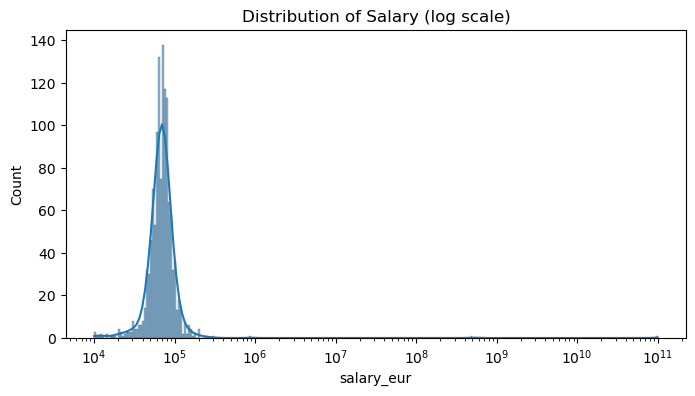

In [218]:
# check for salary outliers
plt.figure(figsize=(8, 4))  
sns.histplot(df['salary_eur'], kde=True, log_scale=True)
plt.title('Distribution of Salary (log scale)') 
plt.show()

In [219]:
df = df[df['salary_eur'] < 1000000]

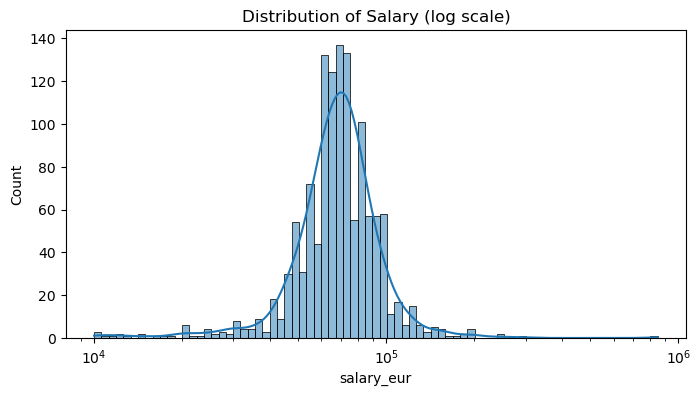

In [220]:
plt.figure(figsize=(8, 4))  
sns.histplot(df['salary_eur'], kde=True, log_scale=True)
plt.title('Distribution of Salary (log scale)') 
plt.show()

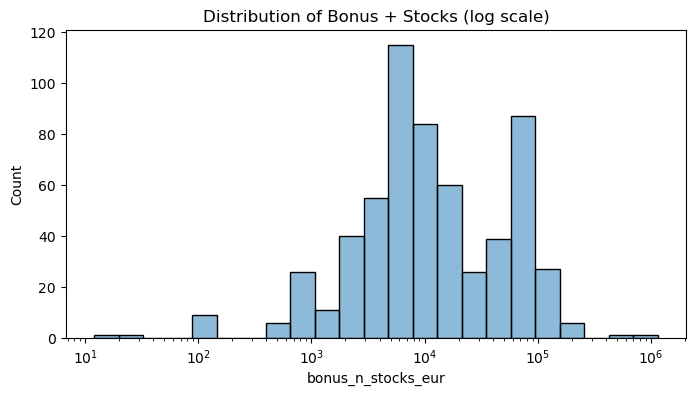

In [221]:
# check for bonus outliers
plt.figure(figsize=(8, 4))  
sns.histplot(df['bonus_n_stocks_eur'], kde=True, log_scale=True)
plt.title('Distribution of Bonus + Stocks (log scale)')
plt.show()

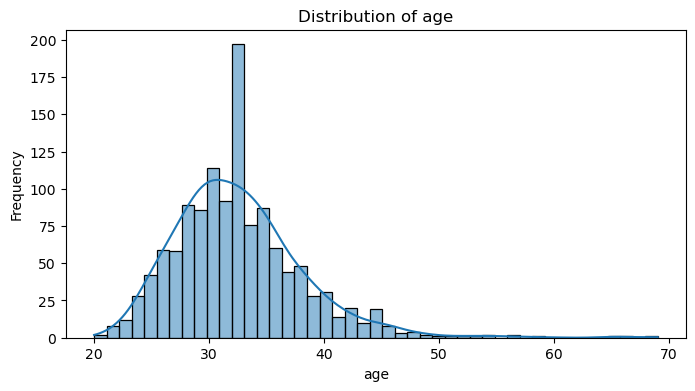

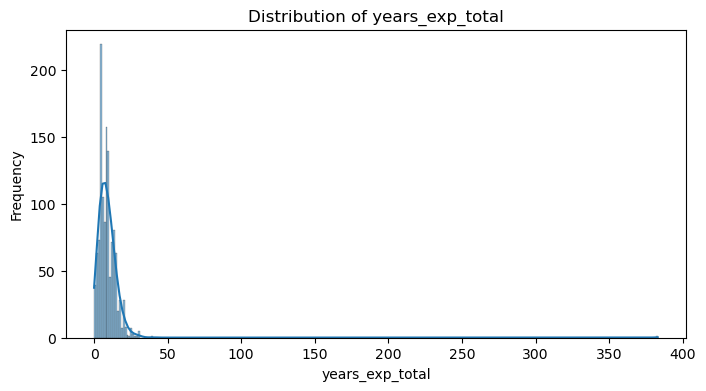

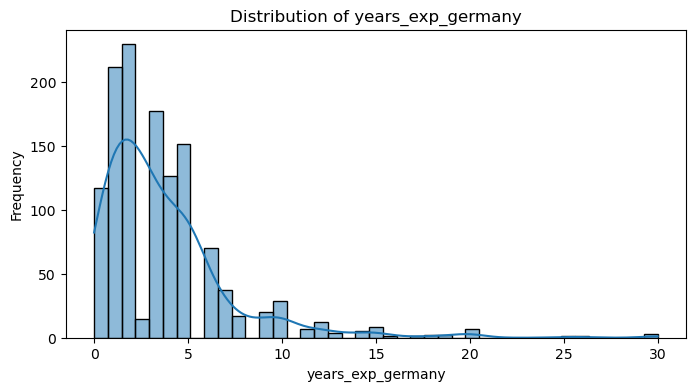

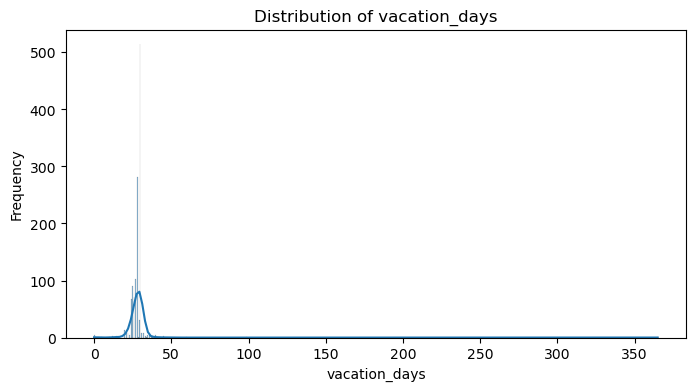

In [ ]:
# checking distribution of numeric columns
for col in numeric:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


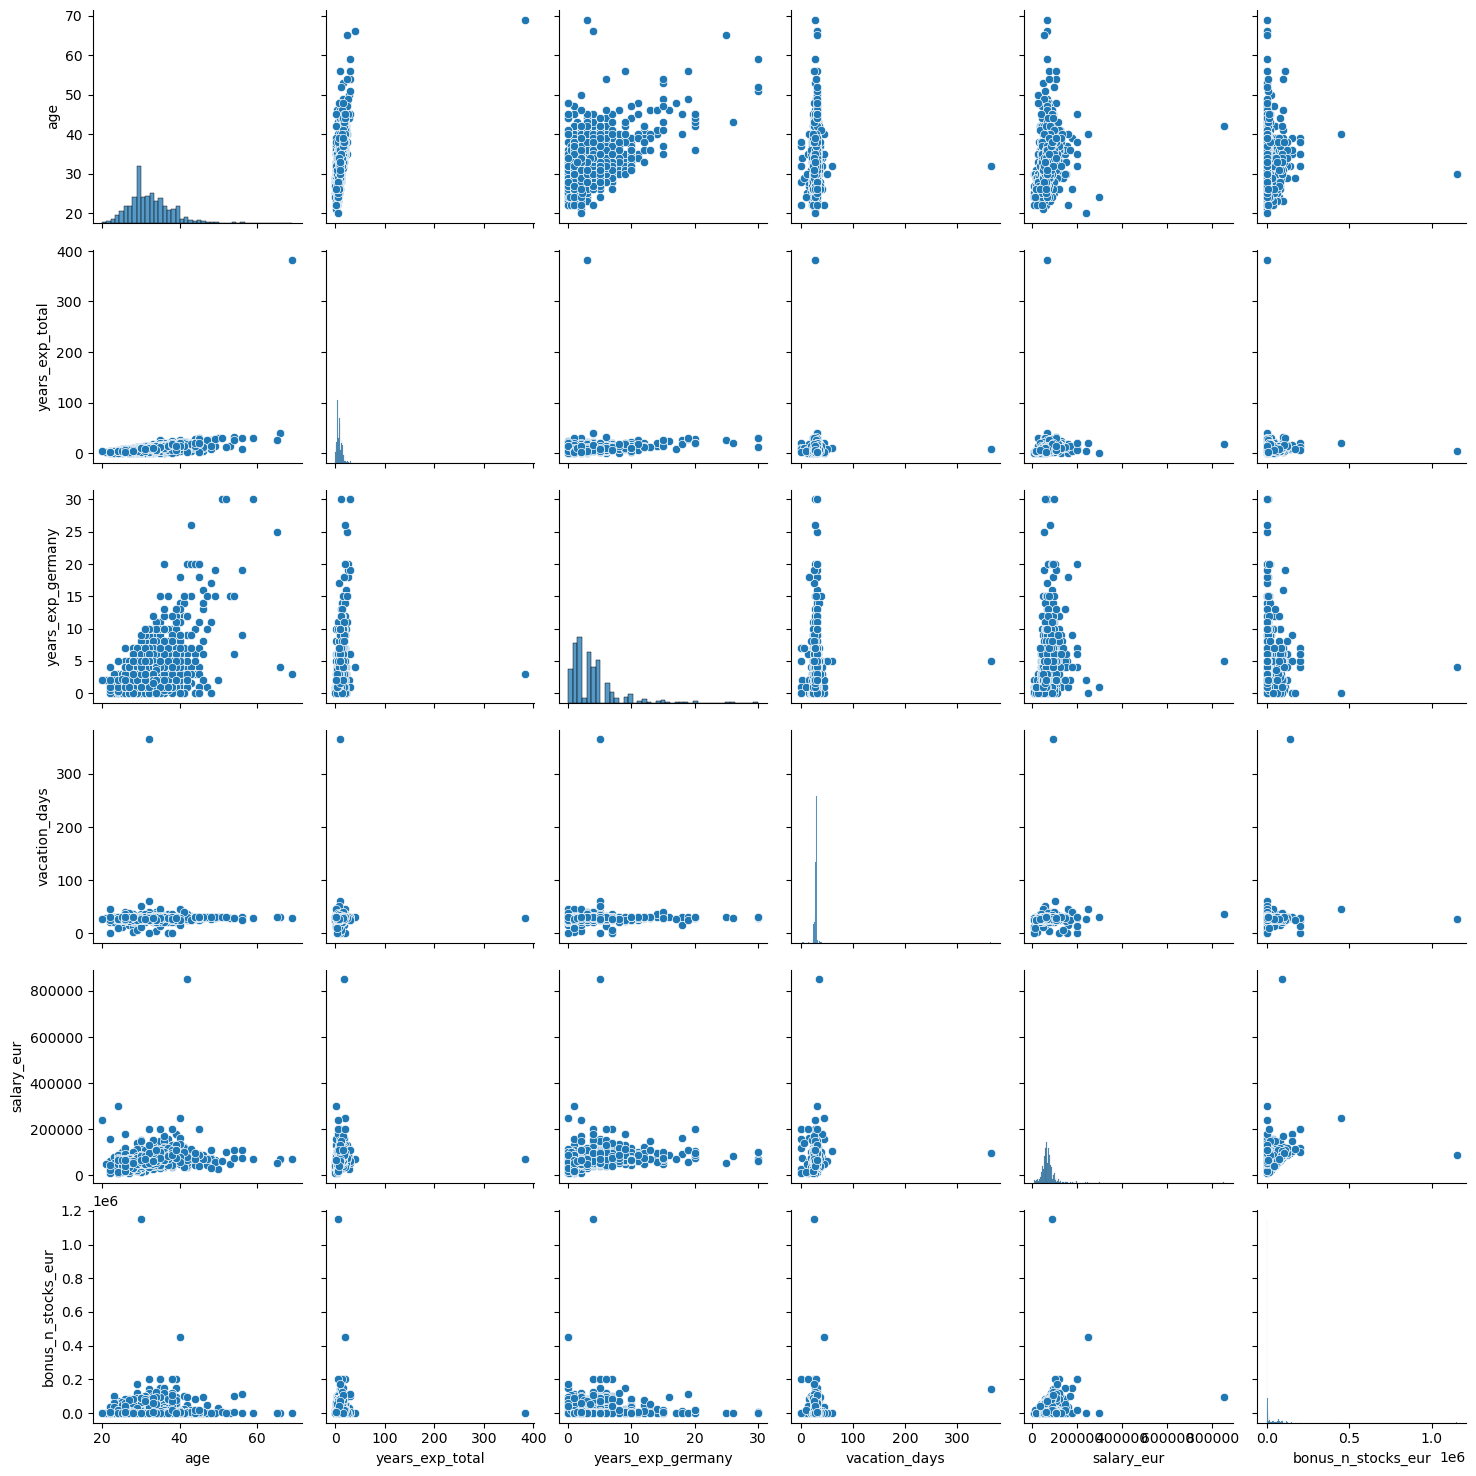

In [222]:
sns.pairplot(df[numeric])

In [225]:
df = df[df['vacation_days'] <= 100]
df = df[df['salary_eur'] <= 500000]
df = df[df['bonus_n_stocks_eur'] <= 50000]
df = df[df['years_exp_total'] <= 100]

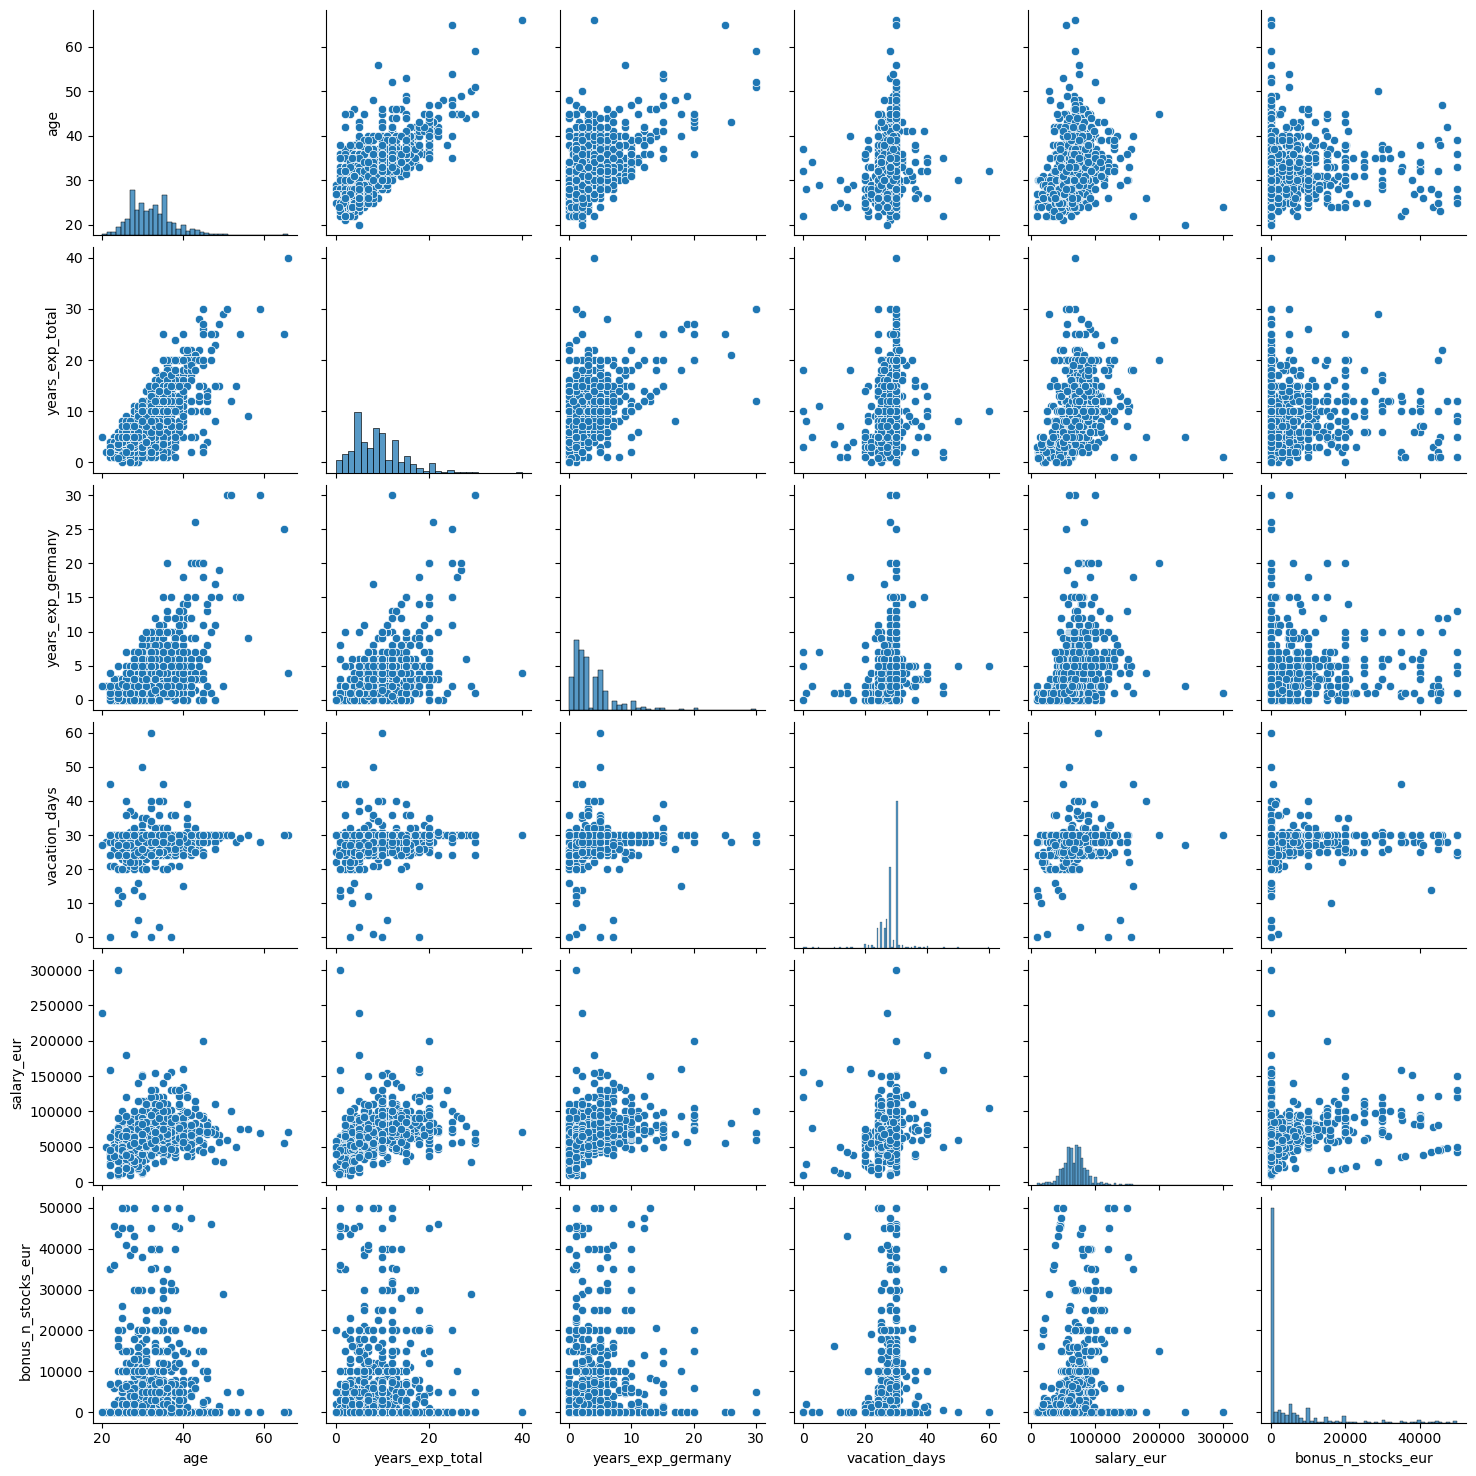

In [226]:
sns.pairplot(df[numeric])

In [229]:
df['total_compensation'] = df['salary_eur'] + df['bonus_n_stocks_eur']

In [242]:
numeric_cols = ['age', 'years_exp_total', 'years_exp_germany', 'vacation_days']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_cols)
    ], 
    remainder='passthrough'
)

In [246]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.feature_selection import VarianceThreshold, RFE

df_features = df.drop(columns=['total_compensation', 'salary_eur', 'bonus_n_stocks_eur'])


y_log = np.log1p(df['total_compensation']) 

X_train, X_test, y_train_log, y_test_log = train_test_split(
    df_features, y_log, test_size=0.2, random_state=42
)

numeric_cols = ['age', 'years_exp_total', 'years_exp_germany', 'vacation_days']
preprocessor = ColumnTransformer(
    transformers=[('num', MinMaxScaler(), numeric_cols)], 
    remainder='passthrough'
)

var_selector = VarianceThreshold(threshold=(.99 * (1 - .99)))

rfe_selector = RFE(
    estimator=RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    n_features_to_select=20, 
    step=5 
)

rf_final = RandomForestRegressor(
    n_estimators=250, 
    max_depth=7, 
    min_samples_leaf=5, 
    random_state=42
)

pipeline = Pipeline([
    ('prep', preprocessor),
    ('variance_filter', var_selector),
    ('rfe_filter', rfe_selector),
    ('regressor', rf_final)
])

pipeline.fit(X_train, y_train_log)

print(f"Original Features: {X_train.shape[1]}")
print(f"Final Features Kept: 20")
print(f"Log-Scale Train R2: {pipeline.score(X_train, y_train_log):.4f}")
print(f"Log-Scale Test R2: {pipeline.score(X_test, y_test_log):.4f}")

y_pred_log = pipeline.predict(X_test)
y_pred_euros = np.expm1(y_pred_log)
y_test_euros = np.expm1(y_test_log)

mae = np.mean(np.abs(y_test_euros - y_pred_euros))
print(f"Average Error in Euros: €{mae:,.0f}")

Original Features: 201
Final Features Kept: 20
Log-Scale Train R2: 0.4117
Log-Scale Test R2: 0.2248
Average Error in Euros: €0


# Answers and Explainations
(Expand/modify as needed)

### Here's the Data Cleaning Steps I Used
1. changed column names to cleaner ones
2. identified cat vs num features
3. imputed unknown or mode for categorical features
4. used salary to impute values for num features
5. one-hot encoded cat features
6. removed outliers of num features

### Here's my Tuning/Feature Selection Steps
1.Log transformation
2. Variance Pruning
3. Feature elimination, just 20 left
4. hyperparameters

### Here's my Model's Performance
Original Features: 201
Final Features Kept: 20
Log-Scale Train R2: 0.4117
Log-Scale Test R2: 0.2248

